In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

Unnamed: 0  Subject  Hold .  Hold t  Hold i  Hold e  Hold Shift  Hold 5  \
0           0      1.0   106.0    92.0   111.0    85.0       123.0    82.0   
1           1      1.0   106.0    88.0   111.0    83.0       123.0   101.0   
2           2      1.0   106.0    90.0   111.0    65.0        79.0    73.0   
3           3      1.0   106.0    81.0   111.0    72.0        83.0    94.0   
4           4      1.0   106.0    72.0   111.0    82.0        62.0    89.0   

   Hold Shift.1  Hold Caps  ...  Size Caps    Size r    Size o    Size a  \
0          70.0     101.00  ...   0.225806  0.225806  0.322581  0.290323   
1          81.0      94.00  ...   0.225806  0.225806  0.322581  0.322581   
2          96.0      63.25  ...   0.225806  0.193548  0.290323  0.322581   
3          89.0     104.00  ...   0.225806  0.225806  0.258065  0.290323   
4          68.0      88.00  ...   0.290323  0.225806  0.322581  0.258065   

     Size n    Size l  Size Enter         AvH       AvP       AvA  
0  0.225806  0.354839    0.274194  103.035714  0.190971  0.288018  
1  0.258065  0.387097    0.322581  103.035714  0.186514  0.285138  
2  0.225806  0.258065    0.274194  103.035714  0.186171  0.285138  
3  0.225806  0.322581    0.322581  103.035714  0.177943  0.285138  
4  0.225806  0.290323    0.387097  103.035714  0.163971  0.285138  

[5 rows x 73 columns]

In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

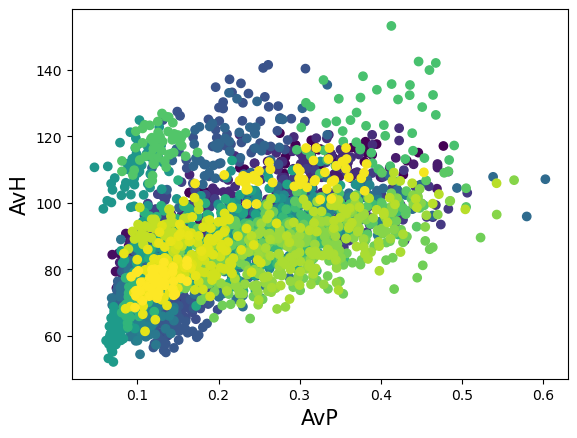

In [4]:
# 2D plot for 2 features from the dataset
import matplotlib.pyplot as plt
plt.scatter(group_16_df['AvP'], group_16_df['AvH'], c = y)
plt.xlabel('AvP', fontsize=15)
plt.ylabel('AvH', fontsize=15);
plt.show()

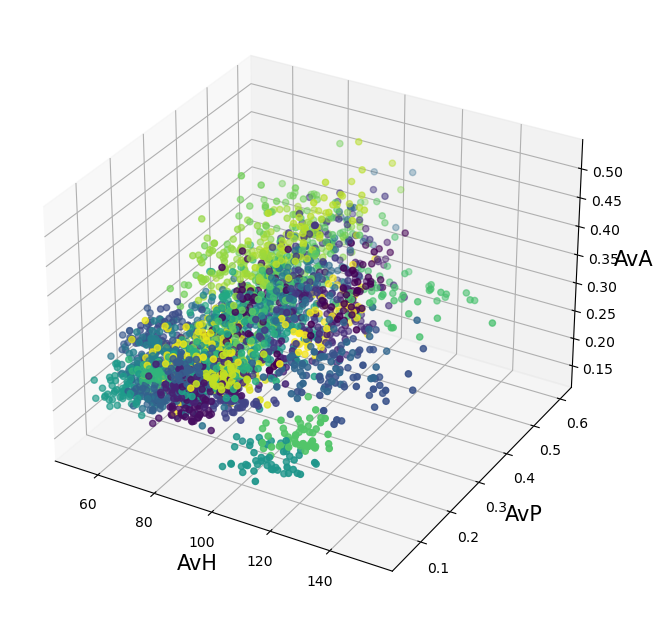

In [5]:
# 3D plot for 3 features from the dataset
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(group_16_df['AvH'], group_16_df['AvP'], group_16_df['AvA'], c=y)
ax.set_xlabel('AvH', fontsize=15)
ax.set_ylabel('AvP', fontsize=15)
ax.set_zlabel('AvA', fontsize=15)
plt.show()

In [6]:
! pip install plotly

In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)

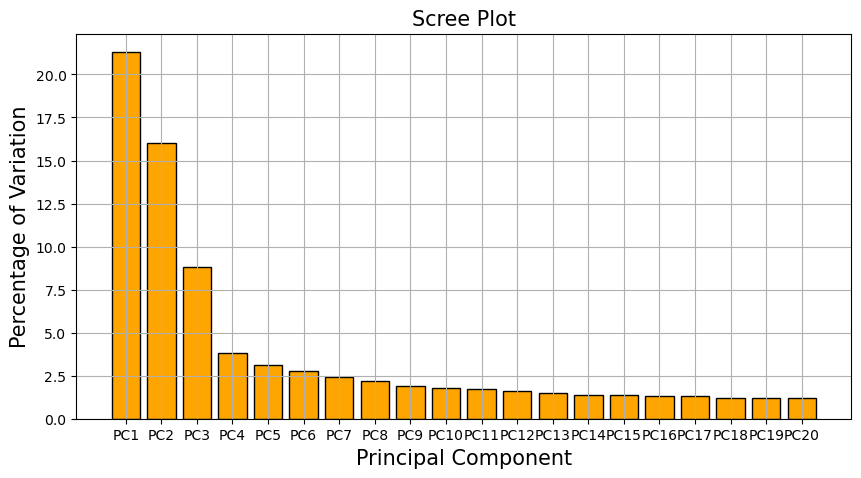

In [8]:
pca_data = PCA(n_components = 71, random_state = 222)
pca_data.fit(x)
per_var = np.round(pca_data.explained_variance_ratio_ * 100, 1)  

plt.figure(figsize = (10, 5))

princ_comp = ["PC" + str(i) for i in range(1, 21)]

plt.bar(x = range(0, 20), height = per_var[:20], tick_label = princ_comp, color = 'orange' , edgecolor='black')
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [9]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
plt.figure(figsize = (12,10))

# implementing one dimensional reduction using PCA
pca_data = PCA(n_components=3,random_state=222)
pca_data.fit(x)
pca_trans=pca_data.transform(x)
labels = {
    str(i): f"PC {i+1} ({var:.2f}%)"
    for i, var in enumerate(pca_data.explained_variance_ratio_ * 100)}

fig = px.scatter_matrix(pca_trans,labels=labels,dimensions=range(3),color=y)
fig.update_traces(diagonal_visible=True)
fig.show()

<Figure size 1200x1000 with 0 Axes>

In [10]:
per_var = np.round(pca_data.explained_variance_ratio_*100, 1)    
print(per_var)

[21.3 16.   8.8]


[21.3 16.   8.8]


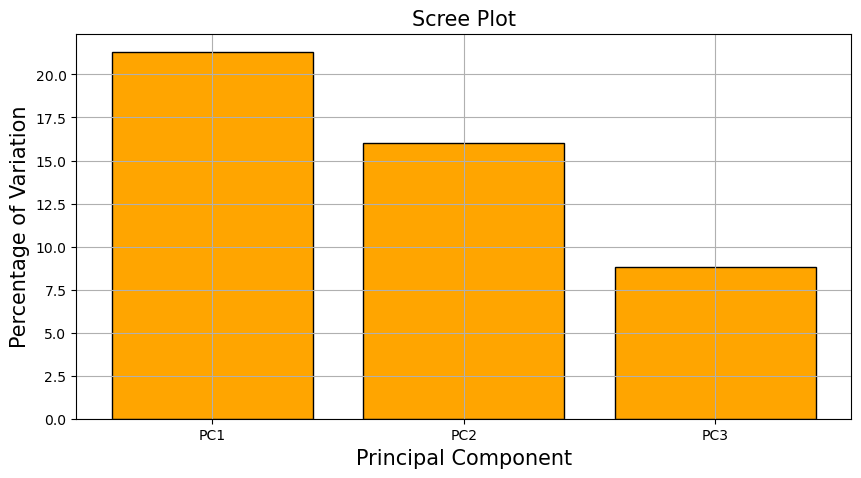

In [11]:
per_var = np.round(pca_data.explained_variance_ratio_*100, 1)    
print(per_var)

plt.figure(figsize = (10,5))

princ_comp = ["PC" + str(x) for x in range(1,4)]

plt.bar(x = range(1,4), height = per_var, tick_label = princ_comp,color = 'orange', edgecolor='black')
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [12]:
pca_trans = pd.DataFrame(pca_trans, columns = princ_comp)
pca_trans

PC1       PC2       PC3
0    -0.415447 -0.137914 -1.455045
1    -0.838479  0.200547 -1.926491
2    -1.208807 -0.869611 -1.189900
3    -1.241414 -0.423675 -1.508542
4    -1.686361 -0.682451 -0.722210
...        ...       ...       ...
2851 -6.262527  0.439659 -1.087177
2852 -5.219722  0.141647  1.187755
2853 -3.333954 -0.161255  1.067766
2854 -4.681596 -0.108645  1.368567
2855 -4.752339 -0.723877  1.739829

[2856 rows x 3 columns]

In [13]:
df_components = pd.DataFrame(pca_data.components_,columns = group_16_df.iloc[:, 2:].columns)
df_components

Hold .    Hold t    Hold i    Hold e  Hold Shift    Hold 5  Hold Shift.1  \
0  0.097049  0.089379  0.091591  0.105463    0.126216  0.065764      0.128369   
1  0.124178  0.122999  0.104408  0.122237    0.076819  0.137713      0.078586   
2 -0.200064 -0.179528 -0.240752 -0.157286   -0.141694 -0.188006     -0.141646   

   Hold Caps    Hold r    Hold o  ...  Size Caps    Size r    Size o  \
0   0.136003  0.099407  0.116646  ...   0.145815  0.142628  0.182051   
1   0.072724  0.118464  0.086936  ...   0.011509 -0.000364 -0.031084   
2  -0.147844 -0.173036 -0.223425  ...   0.160213  0.153032  0.119565   

     Size a    Size n    Size l  Size Enter       AvH       AvP       AvA  
0  0.148127  0.133425  0.136093    0.169775  0.150544  0.243206  0.222721  
1 -0.022934  0.000481 -0.037439   -0.031333  0.143050  0.029004 -0.033867  
2  0.114913  0.167122  0.099930    0.099361 -0.254433  0.044056  0.170071  

[3 rows x 71 columns]

Text(0, 0.5, 'Principal Component 2')

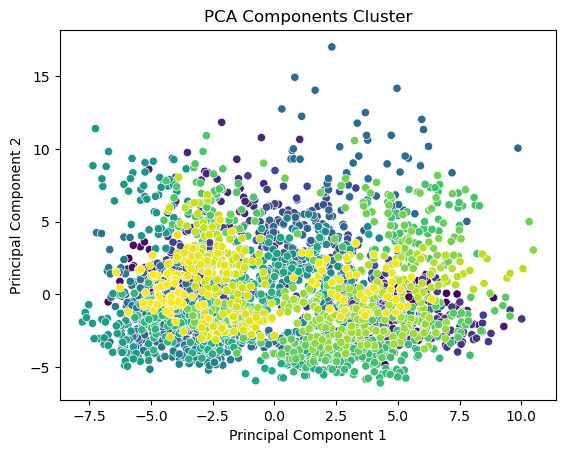

In [14]:
import seaborn as sns
sns.scatterplot(data = pca_trans, x=pca_trans.iloc[:,0], y=pca_trans.iloc[:,1],c=y)
plt.title('PCA Components Cluster')
# Set x-axis label
plt.xlabel('Principal Component 1')
# Set y-axis label
plt.ylabel('Principal Component 2')

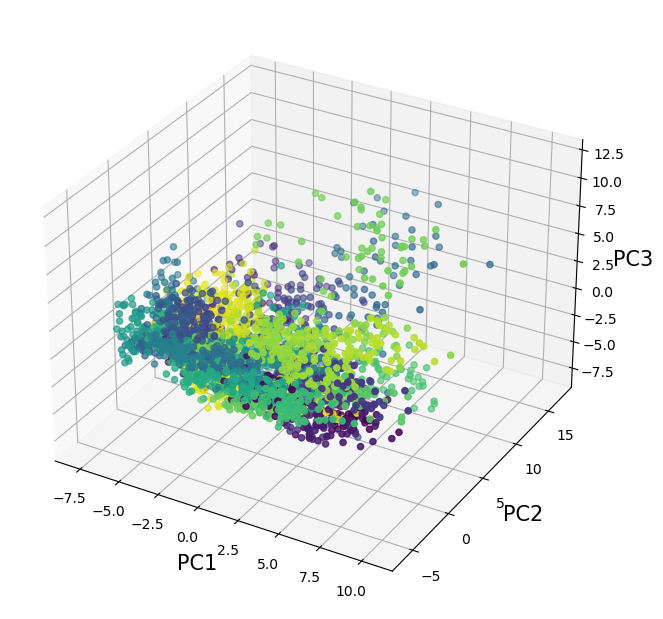

In [15]:
# 3 Component PCA

from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.scatter(pca_trans.PC1, pca_trans.PC2,pca_trans.PC3, c=y)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_zlabel('PC3', fontsize=15)
plt.show()

In [16]:
# extracting and assigning the input and output variables from the dataset

x, y = pca_trans, group_16_df['Subject']
x.shape, y.shape

((2856, 3), (2856,))

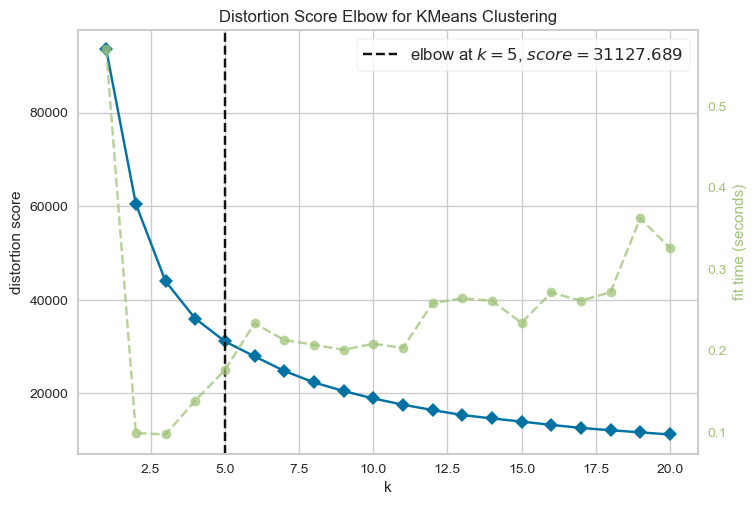

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from  yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

km=KMeans(random_state= 222)
visualizer = KElbowVisualizer(km, k=(1,21))

visualizer.fit(x)
visualizer.show()

In [19]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter=1000, n_init=10).fit(x)

cluster = kmeans.predict(x)
pca_trans["Cluster"]= cluster

Text(0.5, 0, 'Principal Component 3')

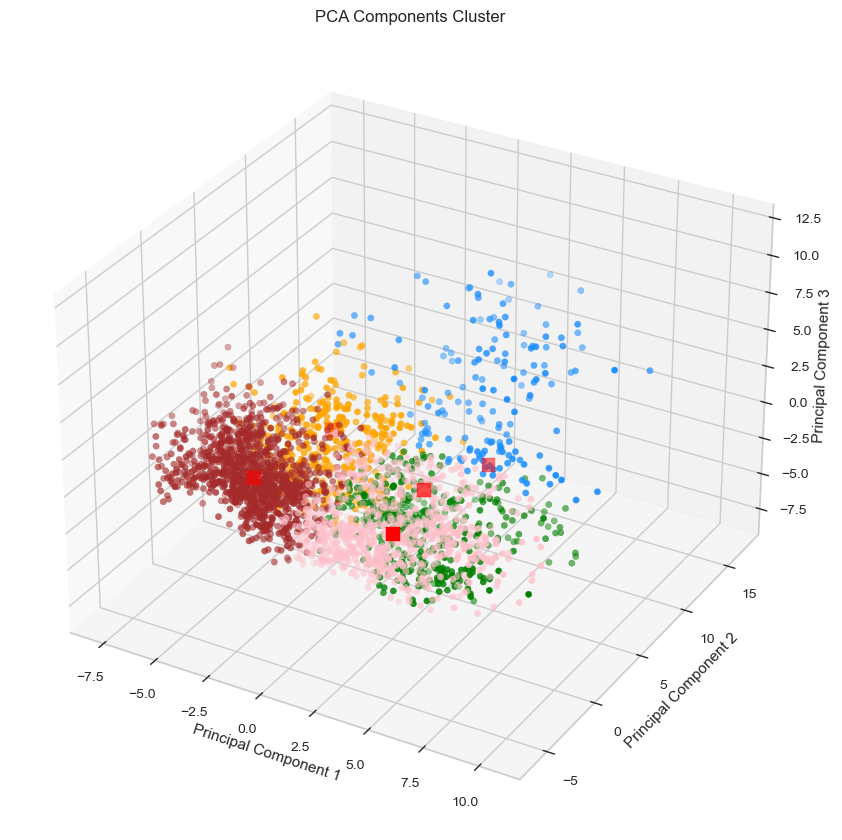

In [20]:
labels = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['green','orange','brown','dodgerblue','pink','purple', 'blue', 'yellow']

fig= plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

for label, color in zip(labels, colors):
    index = pca_trans["Cluster"]==label
    ax.scatter(pca_trans.loc[index, "PC1"],
                pca_trans.loc[index, "PC2"],
                pca_trans.loc[index, "PC3"],
                c = color)
    
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="s", s=100);
ax.set_title('PCA Components Cluster')
# Set x-axis label
ax.set_xlabel('Principal Component 1')
# Set y-axis label
ax.set_ylabel('Principal Component 2')
# Set z-axis label
ax.set_zlabel('Principal Component 3')